## Nonparametric statistical significance tests

non_parametric_tests_assign_solution.ipynb

Complete the assignment below.

References:
- Nonparametric Statistics for Non-Statisticians: A Step-by-Step Approach, 2009.
- How to Calculate Nonparametric Statistical Hypothesis Tests in Python, Jason Brownlee, 2018.


## Assignment

### Exercise 1

Our first dataset includes a very famous dataset, the Winsconsin Breast cancer dataset which is also available in https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic). It includes features for cell nuclei for two categories of tumors: malignant and benign. As explained in the original data source:

>Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

Dataset:
- https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/breast_cancer.csv

We will be using three of these features for our exercise: 
- diagnosis: the classification of the tumor with values "M" (malignant) and "B" (benign).
- area_mean: the average area covered by the tumor cells
- concavity_mean: severity of concave portions of the contour
- texture_mean: standard deviation of gray-scale values

For the three features described above(area_mean, concavity_mean, texture_mean), is there a difference in their average values in the two diagnosis groups? (Do samples of these features originate from the same distribution?)
- Select and apply the appropriate statistical test.
- Provide brief rationale for your selection of statistical test.
- Generate boxplots to compare experimental vs. control for t1, t2, and t3.


In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

df = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/breast_cancer.csv")
df = df[["diagnosis", 'area_mean', 'concavity_mean', 'texture_mean']]
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,diagnosis,area_mean,concavity_mean,texture_mean
0,M,1001.0,0.3001,10.38
1,M,1326.0,0.0869,17.77
2,M,1203.0,0.1974,21.25
3,M,386.1,0.2414,20.38
4,M,1297.0,0.1980,14.34


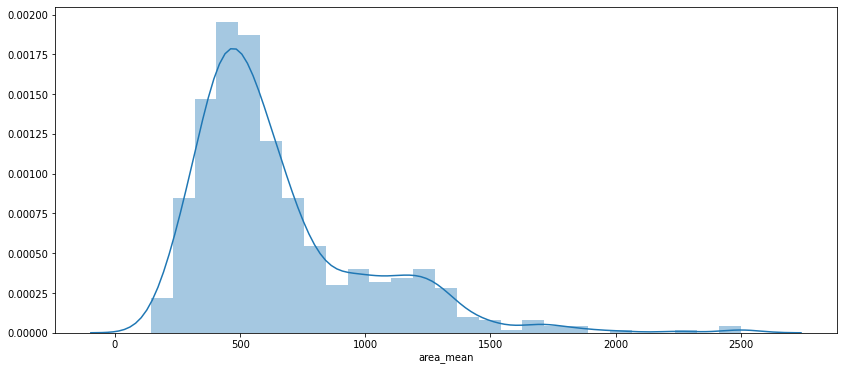

In [48]:
# Check the distribution of classes for the the diagnosis column
plt.figure(figsize=(14,6))
sns.distplot(a=df['area_mean'])
plt.show()

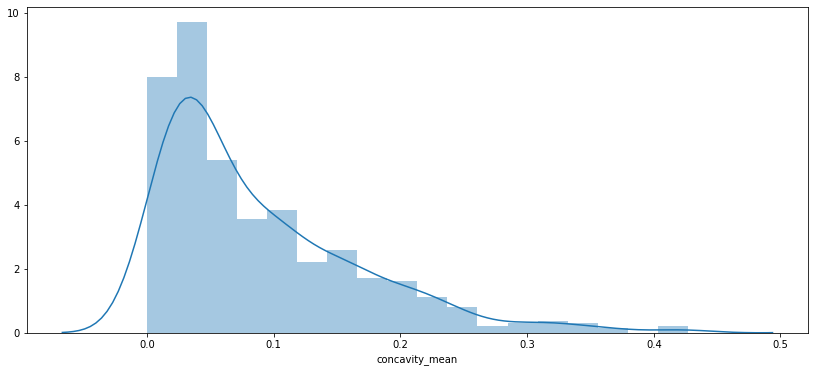

In [49]:
plt.figure(figsize=(14,6))
sns.distplot(a=df['concavity_mean'])
plt.show()

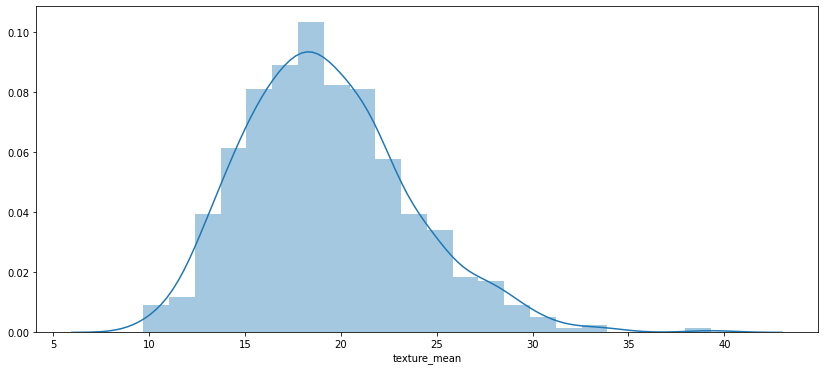

In [50]:
plt.figure(figsize=(14,6))
sns.distplot(a=df['texture_mean'])
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 4 columns):
diagnosis         569 non-null object
area_mean         569 non-null float64
concavity_mean    569 non-null float64
texture_mean      569 non-null float64
dtypes: float64(3), object(1)
memory usage: 17.9+ KB


We explore if the referenced features follow a normal distribution. We examine the skewness and kurtosis of the groups.

Optional: We can run a Jarque–Bera test which tests if the data have the skewness and kurtosis matching a normal distribution.
In the case of the Jarque–Bera test the null hypothesis would state that the skewness and kurtosis matches that of a normal distribution.

In [ ]:
# Print the skewness and kurtosis of the groups. Optionally run a Jarque–Bera
# Afterwards you can comment your findings wether the features follow a normal distribution of not.

In [18]:
malignant = df[df.diagnosis=='M'][['area_mean', 'concavity_mean', 'texture_mean']]
benign = df[df.diagnosis=='B'][['area_mean', 'concavity_mean', 'texture_mean']]

In [35]:
print('Malignant Group- area_mean feature:')
print(stats.describe(malignant['area_mean']))
# print(stats.jarque_bera(malignant['area_mean']))
print(stats.shapiro(malignant['area_mean']))

Malignant Group- area_mean feature:
DescribeResult(nobs=212, minmax=(361.6, 2501.0), mean=978.3764150943397, variance=135378.3553652866, skewness=1.109744551210065, kurtosis=2.223843454774964)
(0.9332621097564697, 2.969658829954369e-08)


In [36]:
print('Benign Group- area_mean feature:')
print(stats.describe(benign['area_mean']))
# print(stats.jarque_bera(benign['area_mean']))
print(stats.shapiro(benign['area_mean']))

Benign Group- area_mean feature:
DescribeResult(nobs=357, minmax=(143.5, 992.1), mean=462.7901960784313, variance=18033.030100242344, skewness=0.34082567025503224, kurtosis=0.28842005191069164)
(0.9906416535377502, 0.02278628945350647)


For the `area_mean` feature, the malignant group does not follow a normal distribution as it does no pass the shapiro normality test with a p-value < 0.05. The benign group is almost normal, with a shapiro p-value of 0.023, but still fails to pass the normality test. 

In [37]:
print('Malignant Group- concavity_mean feature:')
print(stats.describe(malignant['concavity_mean']))
# print(stats.jarque_bera(malignant['concavity_mean']))
print(stats.shapiro(malignant['concavity_mean']))

Malignant Group- concavity_mean feature:
DescribeResult(nobs=212, minmax=(0.02398, 0.4268), mean=0.16077471698113208, variance=0.005627899551104355, skewness=0.8952361063235286, kurtosis=1.0975606181162627)
(0.95293128490448, 1.9665981199068483e-06)


In [38]:
print('Benign Group- concavity_mean feature:')
print(stats.describe(benign['concavity_mean']))
# print(stats.jarque_bera(benign['concavity_mean']))
print(stats.shapiro(benign['concavity_mean']))

Benign Group- concavity_mean feature:
DescribeResult(nobs=357, minmax=(0.0, 0.4108), mean=0.04605762100840336, variance=0.0018872204874219448, skewness=3.4586534729093175, kurtosis=20.527388984137698)
(0.7372753620147705, 2.2455432115817253e-23)


For the `concavity_mean` feature, neither the malignant group nor the benign group follow a normal distribution. The malignant group is almost normally distributed but fails the shapiro test. The benign group is far from normal as it has a high kurtosis and skew.

In [39]:
print('Malignant Group- texture_mean feature:')
print(stats.describe(malignant['texture_mean']))
# print(stats.jarque_bera(malignant['texture_mean']))
print(stats.shapiro(malignant['texture_mean']))

Malignant Group- texture_mean feature:
DescribeResult(nobs=212, minmax=(10.38, 39.28), mean=21.60490566037736, variance=14.284392882053115, skewness=0.6985549130264693, kurtosis=2.2951980794284896)
(0.9690946340560913, 0.00013415660941973329)


In [40]:
print('Benign Group- texture_mean feature:')
print(stats.describe(benign['texture_mean']))
# print(stats.jarque_bera(benign['texture_mean']))
print(stats.shapiro(benign['texture_mean']))

Benign Group- texture_mean feature:
DescribeResult(nobs=357, minmax=(9.71, 33.81), mean=17.914761904761903, variance=15.961020518994113, skewness=0.9772157090288104, kurtosis=1.1858758625694934)
(0.9441728591918945, 2.384618336126465e-10)


For the `texture_mean` feature, again, neither of the groups are normal. Both groups fail to pass the shapiro normality test and have very small p-values.

In [41]:
# Plot the histograms for the distribution of each feature and for each class (malignant/benign) to visually explore 
# wether these distributions are skewed or not.

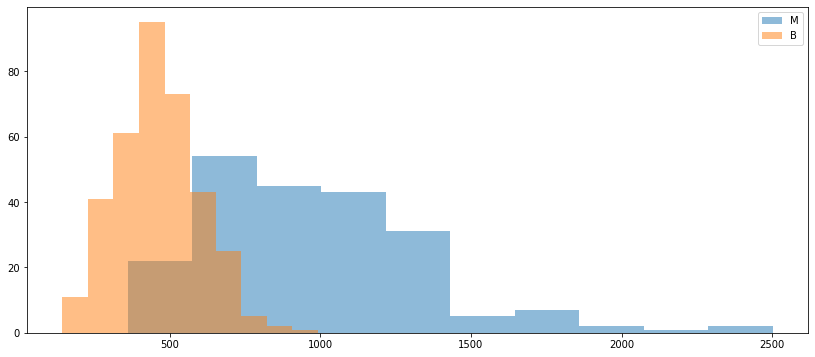

In [42]:
plt.figure(figsize=(14,6))
plt.hist(malignant['area_mean'], alpha = 0.5, label = 'M')
plt.hist(benign['area_mean'], alpha = 0.5, label = 'B')
plt.legend()
plt.show()

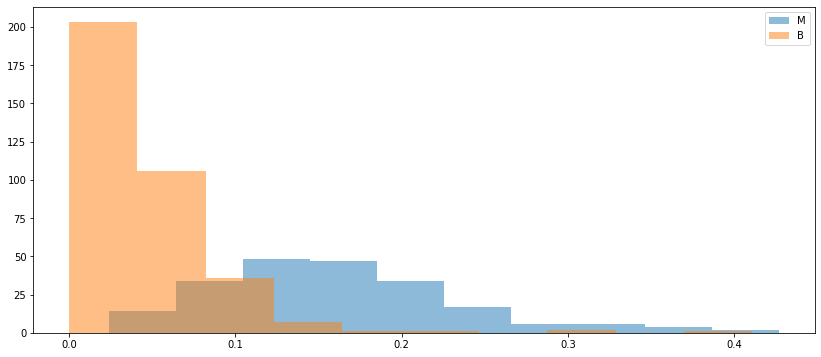

In [24]:
plt.figure(figsize=(14,6))
plt.hist(malignant['concavity_mean'], alpha = 0.5, label = 'M')
plt.hist(benign['concavity_mean'], alpha = 0.5, label = 'B')
plt.legend()
plt.show()

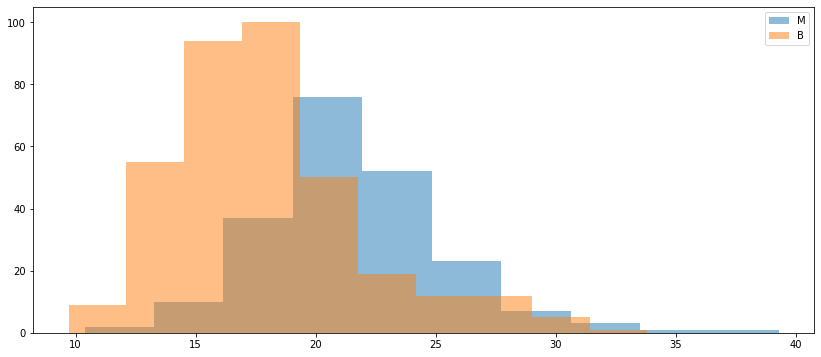

In [23]:
plt.figure(figsize=(14,6))
plt.hist(malignant['texture_mean'], alpha = 0.5, label = 'M')
plt.hist(benign['texture_mean'], alpha = 0.5, label = 'B')
plt.legend()
plt.show()

In [ ]:
# Run 3 Kruskal-Wallis tests, one for each group/feature and describe the results of these tests. 
# State wether the null hypothesis will be rejected or not.

In [44]:
print('Kruskal-Wallis for the area_mean feature:')
print(stats.kruskal(malignant['area_mean'], benign['area_mean']))

Kruskal-Wallis for the area_mean feature:
KruskalResult(statistic=306.1155244413551, pvalue=1.5326695021713592e-68)


In [45]:
print('Kruskal-Wallis for the concavity_mean feature:')
print(stats.kruskal(malignant['concavity_mean'], benign['concavity_mean']))

Kruskal-Wallis for the concavity_mean feature:
KruskalResult(statistic=305.43657612021565, pvalue=2.1545636238729746e-68)


In [46]:
print('Kruskal-Wallis for the texture_mean feature:')
print(stats.kruskal(malignant['texture_mean'], benign['texture_mean']))

Kruskal-Wallis for the texture_mean feature:
KruskalResult(statistic=121.22093055992241, pvalue=3.418605714119009e-28)


The p-values for each of the features in the tests above are significantly less than 0.05. Therefore, we can reject the null hypothesis that the two group, malignant and benign, are statistically the same in each feature.

In [ ]:
# Afterwards create 3 boxplots: one for each feature grouped by the diagnosis class.

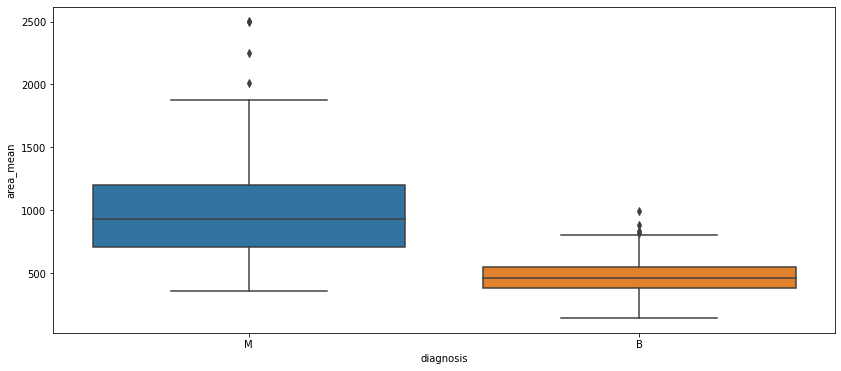

In [51]:
plt.figure(figsize=(14,6))
sns.boxplot(x='diagnosis', y='area_mean', data= df)
plt.show()

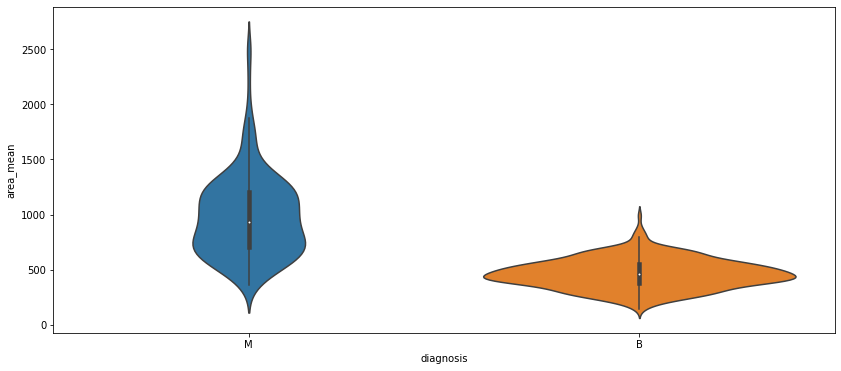

In [47]:
plt.figure(figsize=(14,6))
sns.violinplot(x='diagnosis', y='area_mean', data= df)
plt.show()

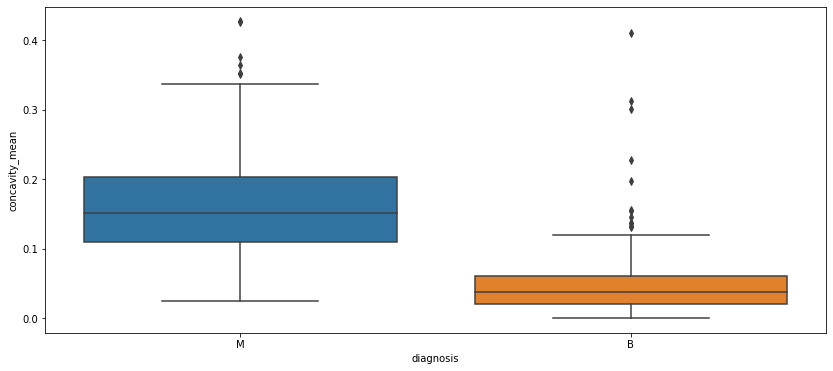

In [52]:
plt.figure(figsize=(14,6))
sns.boxplot(x='diagnosis', y='concavity_mean', data= df)
plt.show()

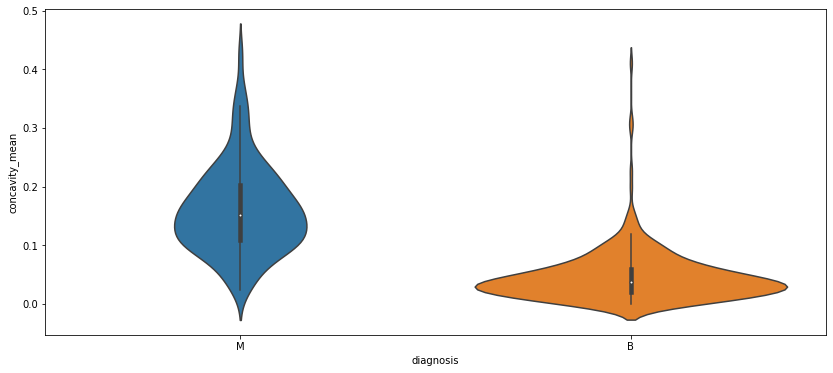

In [9]:
plt.figure(figsize=(14,6))
sns.violinplot(x='diagnosis', y='concavity_mean', data= df)
plt.show()

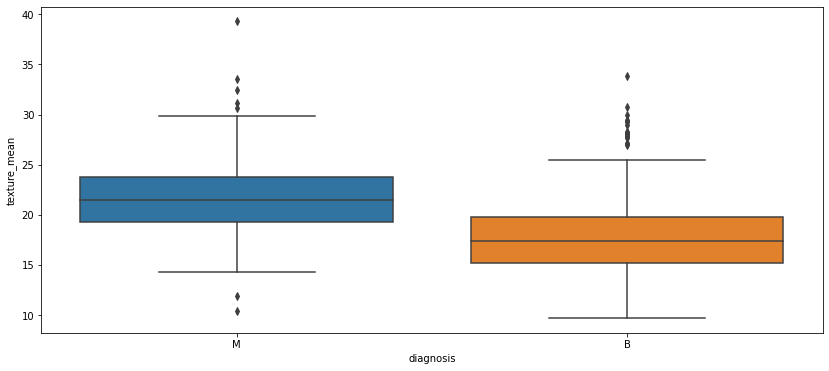

In [53]:
plt.figure(figsize=(14,6))
sns.boxplot(x='diagnosis', y='texture_mean', data= df)
plt.show()

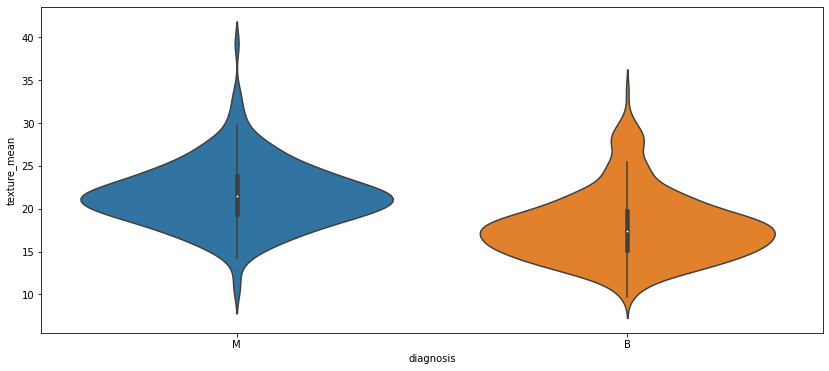

In [6]:
plt.figure(figsize=(14,6))
sns.violinplot(x='diagnosis', y='texture_mean', data= df)
plt.show()

### Exercise 2

For the following test we will use the Real GDP per capita dataset for Europe available by Eurostat from the following address https://ec.europa.eu/eurostat/web/products-datasets/-/sdg_08_10
It contains the GDP per capita for each country (The indicator is calculated as the ratio of real GDP to the average population of a specific year.)
We will use the years 2007, 2008 and 2009 to check if the economic crisis of 2008 affected the GDP values of europe.

Dataset:
- https://ec.europa.eu/eurostat/web/products-datasets/-/sdg_08_10


Questions:

Is there a difference in the GDP per capita between the years (2007 and 2008), (2008 and 2009)?
- Select and apply the appropriate statistical test.


Our dataset needs some cleaning at first. We extract only the columns of interest, clean numeric columns of unwanted characters and convert these columns to numeric.
We also remove rows that refer to collective index for many countries ("EA19", "EU27","EU28") and keep individual countries.

In [56]:
gdp = pd.read_csv("https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/sdg_08_10.tsv.gz",
                 compression='gzip', sep=r'\,|\t', usecols=["unit", "geo\\time", "2007 ", "2008 ", "2009 "], engine='python')
gdp = gdp[gdp.unit=="CLV10_EUR_HAB"].drop(["unit"], axis=1)
gdp.columns=["country", "2007", "2008", "2009"]
gdp = gdp[~gdp.country.isin(["EA19", "EU27","EU28"])]
gdp['2007'] = gdp['2007'].str.extract('(\d+)', expand=False).astype(int)
gdp['2008'] = gdp['2008'].str.extract('(\d+)', expand=False).astype(int)
gdp['2009'] = gdp['2009'].str.extract('(\d+)', expand=False).astype(int)
gdp.info()
gdp.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 37
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  36 non-null     object
 1   2007     36 non-null     int64 
 2   2008     36 non-null     int64 
 3   2009     36 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ KB


,country,2007,2008,2009
0,AT,35870,36280,34830
1,BE,33760,33640,32700
2,BG,4820,5140,4990
3,CH,56400,56940,55050
4,CY,24420,24680,23550


In [55]:
gdp.describe()

,2007,2008,2009
count,36.000000,36.000000,36.000000
mean,25374.166667,25322.777778,24016.388889
std,18764.549764,18367.127719,17541.855441
min,3200.000000,3370.000000,3350.000000
25%,10332.500000,10402.500000,9625.000000
50%,23535.000000,23380.000000,22315.000000
75%,35937.500000,36025.000000,33677.500000
max,84420.000000,81880.000000,76900.000000


Data that refer to economic indices usually do not follow a normal distribution, something we can easily observe by visualizing the data below, hence we should use non parametric tests.

In [ ]:
# Plot the histogram for the values of each year.

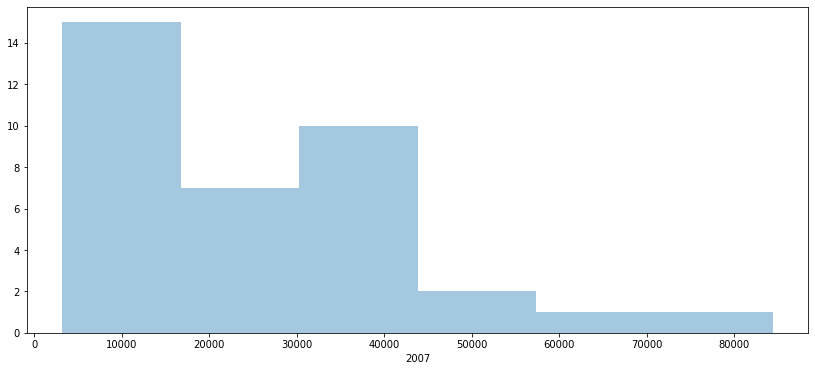

In [80]:
plt.figure(figsize=(14,6))
sns.distplot(gdp['2007'], kde=False)
plt.show()

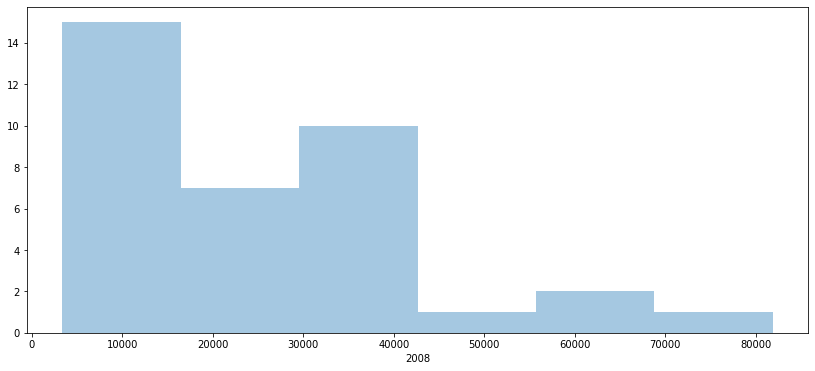

In [69]:
plt.figure(figsize=(14,6))
sns.distplot(gdp['2008'], kde=False)
plt.show()

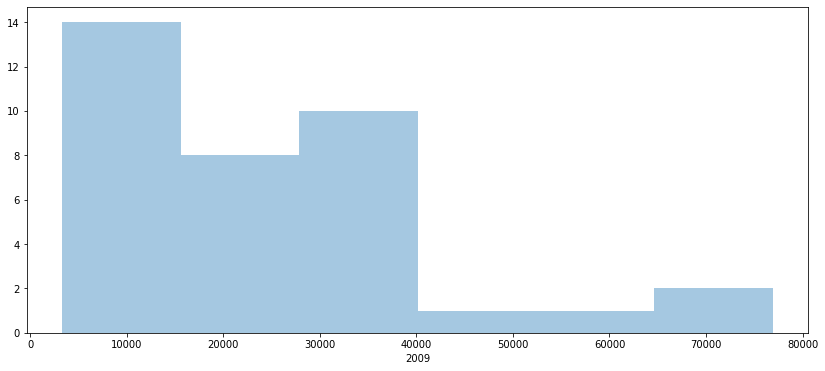

In [70]:
plt.figure(figsize=(14,6))
sns.distplot(gdp['2009'], kde=False)
plt.show()

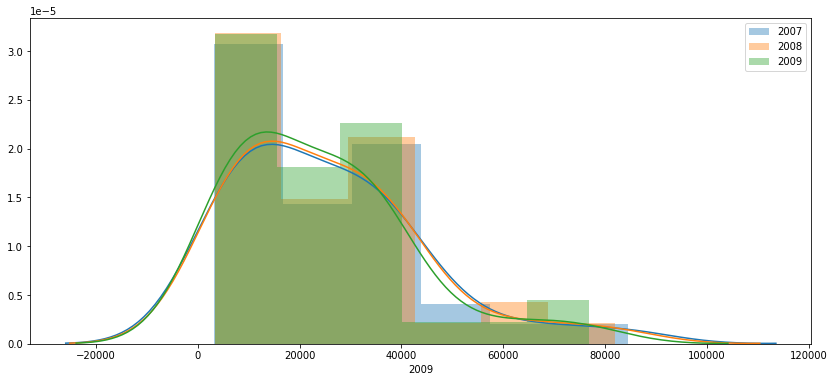

In [67]:
plt.figure(figsize=(14,6))
sns.distplot(gdp['2007'], label='2007')
sns.distplot(gdp['2008'], label='2008')
sns.distplot(gdp['2009'], label='2009')
plt.legend()
plt.show()

We will run a Wilcoxon Signed-rank Test, which should be run on paired samples or repeated measurements on a single sample. In our case we have repeated measurements (three years) of GDP for the same countries.

The null hypothesis for this test is that the medians of two samples are equal.
First we compare 2007 with 2008 values:

In [ ]:
# Run a Wilcoxon Signed-rank test for years (groups) 2007 and 2008 and describe the results of the test. 

In [71]:
stats.wilcoxon(gdp['2007'], gdp['2008'])

WilcoxonResult(statistic=278.5, pvalue=0.3918214607306295)

From the Wilcoxon test for years 2007 and 2008 there is a p-value of 0.39, which is greater than 0.05. Therefore, we cannot reject the null hypothesis that these two groups are statistically different. 

In [ ]:
# Run a Wilcoxon Signed-rank Test for years (groups) 2008 and 2009 and describe the results of the test. 

In [72]:
stats.wilcoxon(gdp['2008'], gdp['2009'])

WilcoxonResult(statistic=4.0, pvalue=2.356281382362627e-07)

From the Wilcoxon test for years 2008 and 2009 there is a p-value which is much less than 0.05. Therefore, we can reject the null hypothesis that these two groups are statistically different.

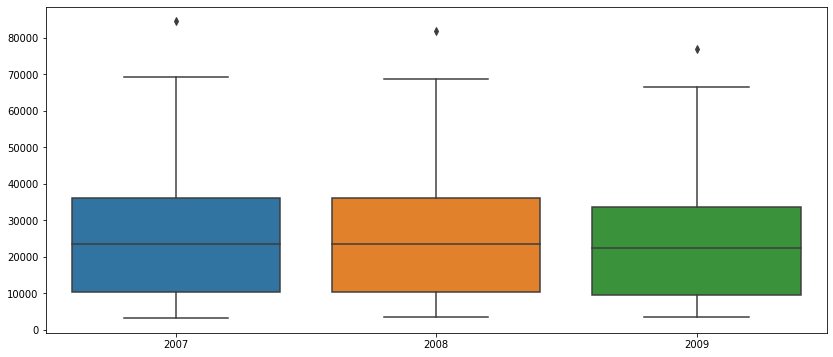

In [76]:
plt.figure(figsize=(14,6))
sns.boxplot(data= gdp)
plt.show()